### **Step 1: Install and Import Libraries**

In [ ]:
pip install google-play-scraper nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re

from google_play_scraper import Sort, reviews_all
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\WT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### **Step 2: Scrape User Reviews from Google Play Store**

In [ ]:
app_reviews = reviews_all(
        "my.com.tngdigital.ewallet",
        sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    )

In [ ]:
df = pd.DataFrame(np.array(app_reviews),columns=['review'])
df2 = df.join(pd.DataFrame(df.pop('review').tolist()))

In [ ]:
reviews_df = df2[['content', 'score']]

### **Step 3: Text Preprocessing**

In [ ]:
reviews_df['content'] = reviews_df['content'].astype(str)
reviews_df['content']= reviews_df['content'].apply(lambda x: x.lower())

C:\Users\WT\AppData\Local\Temp\ipykernel_15668\1868447951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['content'] = reviews_df['content'].astype(str)
C:\Users\WT\AppData\Local\Temp\ipykernel_15668\1868447951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['content']= reviews_df['content'].apply(lambda x: x.lower())


In [ ]:
extracted_text=[]

def extract_reviews(s):
    expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return expe.sub(r'',s)

for y in reviews_df['content']:
    extracted_text.append(str(extract_reviews(y)))

In [ ]:
filtered_text = []
for s in extracted_text:
  filtered_text.append(re.sub('[^a-z *]', "", s))

In [ ]:
reviews_df['content'] = pd.DataFrame(filtered_text)

C:\Users\WT\AppData\Local\Temp\ipykernel_15668\4255706099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['content'] = pd.DataFrame(filtered_text)


In [ ]:
with open('general_corpus.txt', 'w') as f:
  for w in reviews_df['content']:
    f.write("%s " % w)

In [ ]:
pos_reviews = reviews_df[reviews_df['score'] > 3]['content']
neg_reviews = reviews_df[reviews_df['score'] < 3]['content']

In [ ]:
with open('pos_corpus_b4.txt', 'w') as f:
  for w in pos_reviews:
    f.write("%s " % w)

In [ ]:
with open('neg_corpus_b4.txt', 'w') as f:
  for w in neg_reviews:
    f.write("%s " % w)

### **Step 4: Sentiment Analysis**

In [ ]:
sw = []
with open('stopwords.txt', 'r') as f:
  sw.append(f.read().splitlines())

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(sw[0])
stop_words.extend(['pls', 'want', 'n', 'nt', 'tak', 'cant', 'nak', 'x', 'ic', 'saya', 'tidak', 'doesnt'])

In [ ]:
filtered_sentence = []
for s in reviews_df['content']:
  words = s.split()
  l = []
  for word in words:
    if(not word in stop_words):
      l.append(word)
  filtered_sentence.append(' '.join(l))

In [ ]:
reviews_df = reviews_df.join(pd.DataFrame(filtered_sentence))
reviews_df = reviews_df.drop('content', axis = 1)
reviews_df.columns = ['score', 'content']

In [ ]:
pos_reviews = reviews_df[reviews_df['score'] > 3]['content']
neg_reviews = reviews_df[reviews_df['score'] < 3]['content']

In [ ]:
sentiment = []
for s in reviews_df['score']:
  if(s > 3):
    sentiment.append('positive')
  elif(s < 3):
    sentiment.append('negative')
  else:
    sentiment.append('neu')

In [ ]:
reviews_df['sentiment'] = pd.DataFrame(sentiment)

In [ ]:
reviews_df.drop(reviews_df[reviews_df['sentiment'] == 'neu'].index, inplace = True)

Text(0.5, 1.0, "Touch 'n Go User Reviews")

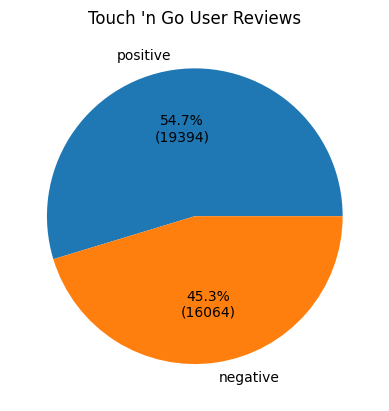

In [ ]:
import matplotlib.pyplot as plt

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = reviews_df['sentiment'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.title("Touch 'n Go User Reviews")

In [ ]:
len(reviews_df)

35458

In [ ]:
len(reviews_df) == (len(pos_reviews) + len(neg_reviews))

True

In [ ]:
with open('pos_corpus.txt', 'w') as f:
  for w in pos_reviews:
    f.write("%s " % w)

In [ ]:
with open('neg_corpus.txt', 'w') as f:
  for w in neg_reviews:
    f.write("%s " % w)